In [50]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [51]:
categories = pd.read_csv('categories.csv')
visitors = pd.read_csv('visitors.csv')
dani1 = pd.read_csv('dani1.csv')
dani2 = pd.read_csv('dani2.csv')
display(categories)
display(visitors)
display(dani1)
display(dani1)

,id_c,service,pricePerHour
0,1,турніки,10
1,2,штанга,15
2,3,особистий тренер,40


,id,surname,name,birthday
0,1,ivanov,ivan,1990-09-01
1,2,petrov,petro,2000-02-07
2,3,sidorov,sidor,1985-11-15
3,4,pavlov,paul,1995-06-20


,date,id,id_c,hours
0,2024-01-02,1,2,1
1,2024-01-03,1,3,2
2,2024-01-03,2,1,2
3,2024-01-03,3,3,3
4,2024-01-04,3,1,1


,date,id,id_c,hours
0,2024-01-02,1,2,1
1,2024-01-03,1,3,2
2,2024-01-03,2,1,2
3,2024-01-03,3,3,3
4,2024-01-04,3,1,1


In [52]:
dani = pd.concat([dani1, dani2], ignore_index=True)
dani

,date,id,id_c,hours
0,2024-01-02,1,2,1
1,2024-01-03,1,3,2
2,2024-01-03,2,1,2
3,2024-01-03,3,3,3
4,2024-01-04,3,1,1
5,2024-01-04,4,1,1
6,2024-01-05,1,1,4


In [53]:
data = pd.merge(dani,categories,on='id_c',how='inner')
data = pd.merge(data, visitors,on='id',how='inner')
display(data)

,date,id,id_c,hours,service,pricePerHour,surname,name,birthday
0,2024-01-02,1,2,1,штанга,15,ivanov,ivan,1990-09-01
1,2024-01-03,1,3,2,особистий тренер,40,ivanov,ivan,1990-09-01
2,2024-01-03,2,1,2,турніки,10,petrov,petro,2000-02-07
3,2024-01-03,3,3,3,особистий тренер,40,sidorov,sidor,1985-11-15
4,2024-01-04,3,1,1,турніки,10,sidorov,sidor,1985-11-15
5,2024-01-04,4,1,1,турніки,10,pavlov,paul,1995-06-20
6,2024-01-05,1,1,4,турніки,10,ivanov,ivan,1990-09-01


In [54]:
data['total'] = data['hours'] * data['pricePerHour']
display(data)    

,date,id,id_c,hours,service,pricePerHour,surname,name,birthday,total
0,2024-01-02,1,2,1,штанга,15,ivanov,ivan,1990-09-01,15
1,2024-01-03,1,3,2,особистий тренер,40,ivanov,ivan,1990-09-01,80
2,2024-01-03,2,1,2,турніки,10,petrov,petro,2000-02-07,20
3,2024-01-03,3,3,3,особистий тренер,40,sidorov,sidor,1985-11-15,120
4,2024-01-04,3,1,1,турніки,10,sidorov,sidor,1985-11-15,10
5,2024-01-04,4,1,1,турніки,10,pavlov,paul,1995-06-20,10
6,2024-01-05,1,1,4,турніки,10,ivanov,ivan,1990-09-01,40


In [55]:
def sum_by_visitor():
    return data.groupby(['surname','name'])['total'].sum().reset_index()
display(sum_by_visitor())

,surname,name,total
0,ivanov,ivan,135
1,pavlov,paul,10
2,petrov,petro,20
3,sidorov,sidor,130


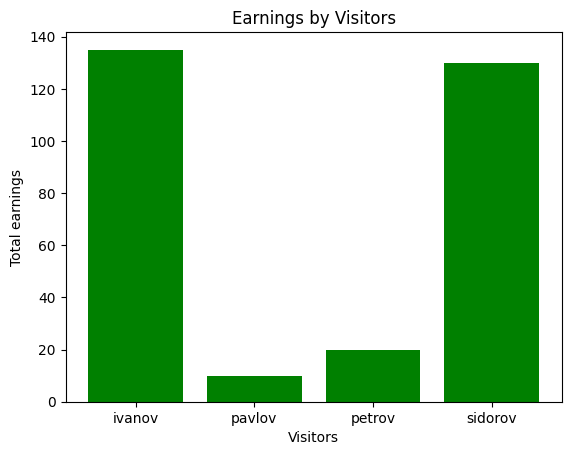

In [56]:
def bar_graph():
    result = sum_by_visitor()
    plt.bar(result['surname'],result['total'],color='green')
    plt.xlabel('Visitors')
    plt.ylabel('Total earnings')
    plt.title('Earnings by Visitors')
    plt.show()
bar_graph()

In [57]:
wd = widgets.Dropdown(
    options=data['service'].unique(),
    description='Тип сервісу: '
)
data['date'] = pd.to_datetime(data['date'])

def show(value):
    if value in data['service'].values:
        filtred = data[data['service'] == value]
        filtred['month'] = filtred['date'].dt.to_period('M')
        aggregated = filtred.groupby(['service', 'month'])['hours'].sum().reset_index()
        display(aggregated)
    else:
        display("Вибраний сервіс не знайдено в даних.")

widget = widgets.interactive(show,value=wd)
display(widget)

interactive(children=(Dropdown(description='Тип сервісу: ', options=('штанга', 'особистий тренер', 'турніки'),…

In [58]:
wd2 = widgets.Dropdown(
    options=data['surname'].unique(),
    description='Відвідувач: '
)
def show2(value):
    if value in data['surname'].values:
        filtred = data[data['surname']==value]
        result = filtred.groupby('surname')['hours'].sum().reset_index()
        display(result)

widget2 = widgets.interactive(show2,value=wd2)

display(widget2)

interactive(children=(Dropdown(description='Відвідувач: ', options=('ivanov', 'petrov', 'sidorov', 'pavlov'), …

In [59]:
display(data)

,date,id,id_c,hours,service,pricePerHour,surname,name,birthday,total
0,2024-01-02,1,2,1,штанга,15,ivanov,ivan,1990-09-01,15
1,2024-01-03,1,3,2,особистий тренер,40,ivanov,ivan,1990-09-01,80
2,2024-01-03,2,1,2,турніки,10,petrov,petro,2000-02-07,20
3,2024-01-03,3,3,3,особистий тренер,40,sidorov,sidor,1985-11-15,120
4,2024-01-04,3,1,1,турніки,10,sidorov,sidor,1985-11-15,10
5,2024-01-04,4,1,1,турніки,10,pavlov,paul,1995-06-20,10
6,2024-01-05,1,1,4,турніки,10,ivanov,ivan,1990-09-01,40


In [64]:
data['date'] = pd.to_datetime(data['date'])
start_date = widgets.DatePicker(
    value=data['date'].min(),
    description='Початкова дата: '
)
end_date = widgets.DatePicker(
    value=data['date'].max(),
    description='Кінцева дата: '
)

def show3(start, end):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)

    flt = (data['date']>=start)&(data['date']<=end)
    filtred = data[flt]
    filtred = filtred.groupby('surname')['total'].sum().reset_index()
    display(filtred)

widget3 = widgets.interactive(show3, start=start_date, end=end_date)

display(widget3)

interactive(children=(DatePicker(value=Timestamp('2024-01-02 00:00:00'), description='Початкова дата: ', step=…